<h1 dir="auto">الانحدار الخطي</h1>


<h2 dir="auto">الأهداف</h2>

| |
|-------|
|**وصف النمذجة الإحصائية مع الانحدار البسيط o**|
|**y= mx +c شرح الانحدار الخطي البسيط كحل للمعادلة  o**|
|**y	رسم خط الانحدار على أساس الميل وتقاطع o**|
|**التنبؤ بمخرجات نموذج انحدار خطي لبيانات جديدة o**|


| |
|-------|
:يمكن كتابة معادلة الانحدار الخطي كـ
|$$y=\beta_0+\beta_1x$$ 
| التقاطع $$\beta_0$$  |   
|وزن الانحدار أو المعامل المرتبط بمتغير التوقع  $$ \beta_1 $$|
| يتم تحديد معاملات الانحدار الخطي بحيث يتم تقليل الخطأ في التنبؤ بقيمة النتيجة 
 هذه الطريقة لحساب معاملات بيتا تسمى طريقة المربعات الصغرى العادية  
 (Ordinary Least Squares)|
 :عندما يكون لديك متغيرات تنبؤ متعددة ،يمكن كتابة معادلة الانحدار كـ 
$$ y=\beta_0+\beta_1x+\beta_2x+...+\beta_nx$$
| **يمكن لنماذج الانحدار الخطي أن تتضمن متغيرات التوقع المستمرة والفئويـة**|



In [ ]:
rm(list=ls())

In [2]:
college<- read.csv("https://raw.githubusercontent.com/datasciencebh/labs/master/colleges.csv")

In [3]:
head(college)

,X,id,name,city,state,region,highest_degree,control,gender,admission_rate,sat_avg,undergrads,tuition,faculty_salary_avg,loan_default_rate,median_debt,lon,lat
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>
1,1,102669,Alaska Pacific University,Anchorage,AK,West,Graduate,Private,CoEd,0.4207,1054,275,19610,5804,0.077,23250.0,-149.90028,61.21806
2,2,101648,Marion Military Institute,Marion,AL,South,Associate,Public,CoEd,0.6139,1055,433,8778,5916,0.136,11500.0,-87.31917,32.63235
3,3,100830,Auburn University at Montgomery,Montgomery,AL,South,Graduate,Public,CoEd,0.8017,1009,4304,9080,7255,0.106,21335.0,-86.29997,32.36681
4,4,101879,University of North Alabama,Florence,AL,South,Graduate,Public,CoEd,0.6788,1029,5485,7412,7424,0.111,21500.0,-87.67725,34.79981
5,5,100858,Auburn University,Auburn,AL,South,Graduate,Public,CoEd,0.8347,1215,20514,10200,9487,0.045,21831.0,-85.48078,32.60986
6,6,100663,University of Alabama at Birmingham,Birmingham,AL,South,Graduate,Public,CoEd,0.8569,1107,11383,7510,9957,0.062,21941.5,-86.80249,33.52066


In [4]:
names(college)

[1] "X"                  "id"                 "name"              
 [4] "city"               "state"              "region"            
 [7] "highest_degree"     "control"            "gender"            
[10] "admission_rate"     "sat_avg"            "undergrads"        
[13] "tuition"            "faculty_salary_avg" "loan_default_rate" 
[16] "median_debt"        "lon"                "lat"

In [5]:
install.packages("GGally")


The downloaded binary packages are in
	/var/folders/hw/83xf1jxs0b58xft1b6ghk0280000gn/T//RtmpuLDqoU/downloaded_packages


In [6]:
library(ggplot2)
library(GGally)

Warning message:
“package ‘GGally’ was built under R version 3.4.4”


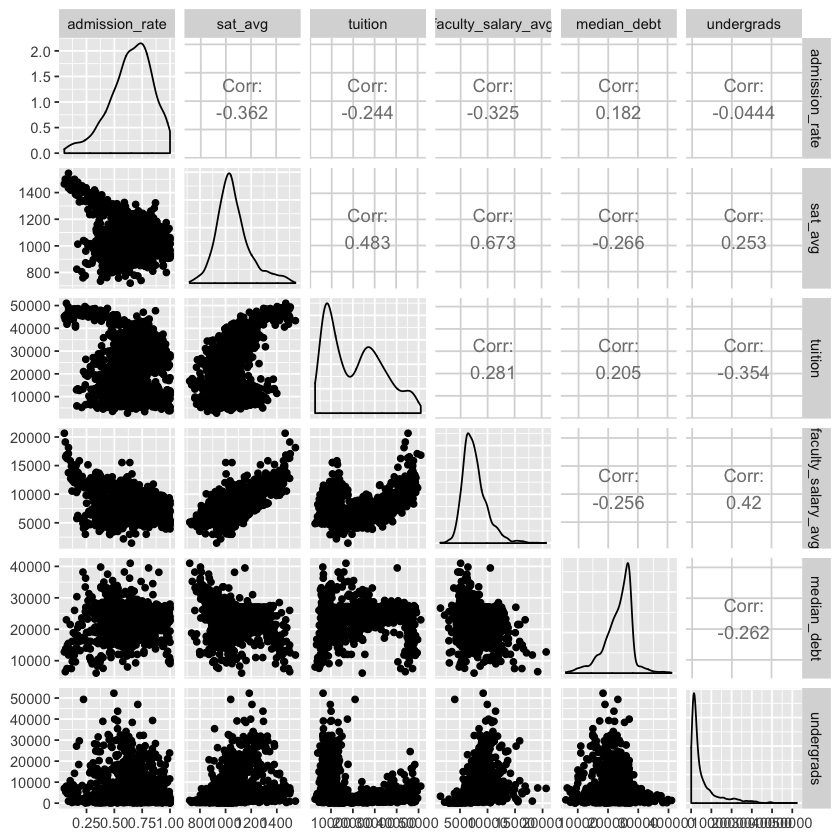

In [7]:
ggpairs(college[,c( "admission_rate", "sat_avg", "tuition", "faculty_salary_avg", "median_debt", "undergrads") ])

In [8]:
attach(college)

In [9]:
cor(faculty_salary_avg, sat_avg)

[1] 0.673311

><h4 dir="auto">
سنقوم بتقسيم البيانات بشكل عشوائي إلى مجموعة تدريب (80٪ لبناء نموذج تنبؤي) ومجموعة اختبار (20٪ لتقييم النموذج). 
   تأكد من تعيين البذور للتكاثر</h4>

  

In [10]:
#install.packages("tidyverse")

In [11]:
#install.packages("caret",
#repos = "http://cran.r-project.org", 
#                dependencies = c("Depends", "Imports", "Suggests"))

In [12]:
library(dplyr)
#library(tidyverse)
theme_set(theme_bw())


Attaching package: ‘dplyr’


The following object is masked from ‘package:GGally’:

    nasa


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [13]:
library(caret)

Loading required package: lattice

Warning message:
“package ‘lattice’ was built under R version 3.4.4”


In [14]:
#   set.seed(123)    فائدة 
# بيانات عشوائية 
#rnorm generates a vector of normally distributed random numbers.
#انشاء مصفرفة لبيانات عشوائية ذات توزيع طبيعي
set.seed(5)
rnorm(5)

[1] -0.84085548  1.38435934 -1.25549186  0.07014277  1.71144087

In [15]:
require(caTools)

Loading required package: caTools

Warning message:
“package ‘caTools’ was built under R version 3.4.4”


In [16]:
# بيانات تدريب واختبار
set.seed(123)
training.samples <- college$tuition %>%
# مجموعة تدريب %80 
createDataPartition(p = 0.8, list = FALSE)
train.data  <- college[training.samples, ]
# مجموعة اختبار
test.data <- college[-training.samples, ]

In [14]:
#Geogebra Demo.Linear/Multi-linear/Polinomial...etc.

In [15]:
# بناء النموذج
model <- lm(tuition ~., data = train.data)
# تلخيص النموذج
summary(model)
# التنبؤ



Call:
lm(formula = tuition ~ ., data = train.data)

Residuals:
ALL 1017 residuals are 0: no residual degrees of freedom!

Coefficients: (967 not defined because of singularities)
                                                                        Estimate
(Intercept)                                                            1.191e+05
X                                                                      4.740e+01
id                                                                    -9.015e-01
nameAdams State University                                            -2.934e+03
nameAdelphi University                                                 4.608e+04
nameAdrian College                                                     4.074e+04
nameAdventist University of Health Sciences                            5.617e+03
nameAlabama A & M University                                          -2.036e+04
nameAlaska Pacific University                                         -6.942e+03
nameAlbany

In [ ]:
# rectify the model to make tuition ~ faculty_salary_avg
# then  summary(model)
# analyze the summary
# std Error, R_squared, Adj_ F stat, Pvalue, Coefficient ...etc.
# use Graphs nad even gglot to depict Error,
# Show how residuals are got in a classic way then using .residuals 
# use. broo library
# then make prediciton with test.data

In [16]:
predictions <- model %>% predict(test.data)
# نجاعة النمودج. 
#  RMSE :تنبؤ الخطأ
RMSE(predictions, test.data$tuition)

ERROR: Error in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$xlevels): factor name has new levels Abilene Christian University, Alabama State University, Alderson Broaddus University, Alfred University, Alice Lloyd College, American University, Amherst College, Arkansas State University-Main Campus, Arkansas Tech University, Art Academy of Cincinnati, Ashland University, Aultman College of Nursing and Health Sciences, Austin College, Azusa Pacific University, Bacone College, Baker University, Berea College, Bloomsburg University of Pennsylvania, Bluefield State College, Briar Cliff University, Bridgewater State University, Butler University, CUNY City College, CUNY Hunter College, California Baptist University, California State University-Northridge, California State University-Sacramento, Cedar Crest College, Central Michigan University, Champlain College, Charleston Southern University, Chicago State University, Christian Brothers University, Cincinnati Christian University, Claflin University, Clark Atlanta University, Clarke University, Cleveland State University, Coker College, College of Staten Island CUNY, College of William and Mary, Colorado State University-Fort Collins, Columbia International University, Columbus College of Art and Design, Concordia College at Moorhead, Concordia University-Nebraska, Concordia University-Wisconsin, Cornell University, Covenant College, Creighton University, D'Youville College, Dakota State University, Dean College, Defiance College, Delaware Valley University, Duquesne University, Eastern Kentucky University, Eastern Nazarene College, Eureka College, Faith Baptist Bible College and Theological Seminary, Fayetteville State University, Ferris State University, Florida Agricultural and Mechanical University, Florida Gulf Coast University, Fort Valley State University, Francis Marion University, Franklin College, Gannon University, Georgetown University, Georgian Court University, Gordon College, Graceland University-Lamoni, Greenville College, Grinnell College, Hamilton College, Hampden-Sydney College, Hampton University, Hofstra University, Houghton College, Huntingdon College, Illinois State University, Indiana University-Bloomington, Indiana University-East, Indiana University-Purdue University-Fort Wayne, Iowa Wesleyan University, Jackson State University, Jacksonville State University, Johnson University Florida, Kennesaw State University, LIM College, LaGrange College, Lafayette College, Lancaster Bible College, Lasell College, Le Moyne College, Lewis University, Lindenwood University, Livingstone College, Louisburg College, Louisiana State University-Alexandria, Loyola University New Orleans, Lubbock Christian University, Lynn University, Macalester College, Maine College of Health Professions, Malone University, Mansfield University of Pennsylvania, Marietta College, Marquette University, Massachusetts College of Art and Design, McKendree University, McNeese State University, McPherson College, Messiah College, Methodist College, Methodist University, Middlebury College, Midwestern Baptist Theological Seminary, Midwestern State University, Minot State University, Misericordia University, Mississippi College, Missouri Baptist University, Montana State University, Montana Tech of the University of Montana, Montreat College, Nebraska Methodist College of Nursing & Allied Health, Nebraska Wesleyan University, New College of Florida, New Jersey City University, New Mexico Institute of Mining and Technology, New Mexico Military Institute, Newman University, North Dakota State University-Main Campus, Northeastern Illinois University, Northwest Nazarene University, Northwestern University, Notre Dame College, Notre Dame of Maryland University, Ohio Christian University, Ohio University-Main Campus, Oklahoma Christian University, Oral Roberts University, Our Lady of the Lake University, Pennsylvania State University-Penn State Brandywine, Pennsylvania State University-Penn State Shenango, Pennsylvania State University-Penn State Wilkes-Barre, Pennsylvania State University-Penn State York, Pfeiffer University, Philadelphia University, Piedmont International University, Pine Manor College, Pittsburg State University, Point Loma Nazarene University, Point University, Prescott College, Queens University of Charlotte, Randolph College, Randolph-Macon College, Regent University, Rhodes College, Rowan University, Rutgers University-Newark, SUNY College at Brockport, SUNY College at Oswego, SUNY at Purchase College, Saint Louis University, Saint Mary's College of California, San Diego Christian College, Savannah College of Art and Design, Shenandoah University, Silver Lake College of the Holy Family, Skidmore College, South Carolina State University, South Dakota School of Mines and Technology, Southeast Missouri State University, Southern Arkansas University Main Campus, Southwestern College, Springfield College, St Mary's College of Maryland, St Mary's University, State University of New York at New Paltz, Stephen F Austin State University, Stillman College, Swarthmore College, Taylor University, Tennessee Technological University, Texas State University, Texas Wesleyan University, The College of New Rochelle, The University of Tampa, Tougaloo College, Trinity International University-Illinois, Truett-McConnell College, Tulane University of Louisiana, University at Buffalo, University of Akron Main Campus, University of Alabama at Birmingham, University of Arkansas Community College-Morrilton, University of Arkansas at Little Rock, University of California-Los Angeles, University of Central Oklahoma, University of Colorado Denver/Anschutz Medical Campus, University of Connecticut, University of Dallas, University of Denver, University of Hartford, University of Illinois at Springfield, University of Jamestown, University of Maine at Fort Kent, University of Mary, University of Maryland-Baltimore County, University of Massachusetts-Amherst, University of Michigan-Ann Arbor, University of Mobile, University of North Carolina at Asheville, University of North Dakota, University of North Florida, University of Pittsburgh-Johnstown, University of Portland, University of Saint Joseph, University of San Diego, University of Science and Arts of Oklahoma, University of South Alabama, University of South Carolina-Lancaster, University of South Carolina-Salkehatchie, University of South Carolina-Sumter, University of Southern California, University of Southern Maine, University of Southern Mississippi, University of Washington-Tacoma Campus, University of Wisconsin-Milwaukee, University of Wisconsin-Whitewater, University of the Pacific, University of the Sciences, Ursuline College, Virginia Military Institute, Virginia Union University, Wabash College, Waldorf College, Waynesburg University, Webster University, Wellesley College, Westmont College, Wheelock College, Whitman College, Willamette University, William Peace University, Winston-Salem State University, Yale University


In [17]:
# (b) R-square.  another way to get R^2
R2(predictions, test.data$tuition)

ERROR: Error in complete.cases(pred): object 'predictions' not found


In [18]:
# Split the data into training and test set 
# بيانات تدريب واختبار
set.seed(123)
training.samples <- college$tuition %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data  <- college[training.samples, ]
test.data <- college[-training.samples, ]

In [19]:
#Computing linear regression
#The R function lm() is used to compute linear regression model.
# Build the model

model <- lm(tuition ~., data = train.data)
# Summarize the model
summary(model)
# Make predictions
predictions <- model %>% predict(test.data)
# Model performance
# (a) Prediction error, RMSE
RMSE(predictions, test.data$tuition)



Call:
lm(formula = tuition ~ ., data = train.data)

Residuals:
ALL 1017 residuals are 0: no residual degrees of freedom!

Coefficients: (967 not defined because of singularities)
                                                                        Estimate
(Intercept)                                                            1.191e+05
X                                                                      4.740e+01
id                                                                    -9.015e-01
nameAdams State University                                            -2.934e+03
nameAdelphi University                                                 4.608e+04
nameAdrian College                                                     4.074e+04
nameAdventist University of Health Sciences                            5.617e+03
nameAlabama A & M University                                          -2.036e+04
nameAlaska Pacific University                                         -6.942e+03
nameAlbany

ERROR: Error in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$xlevels): factor name has new levels Abilene Christian University, Alabama State University, Alderson Broaddus University, Alfred University, Alice Lloyd College, American University, Amherst College, Arkansas State University-Main Campus, Arkansas Tech University, Art Academy of Cincinnati, Ashland University, Aultman College of Nursing and Health Sciences, Austin College, Azusa Pacific University, Bacone College, Baker University, Berea College, Bloomsburg University of Pennsylvania, Bluefield State College, Briar Cliff University, Bridgewater State University, Butler University, CUNY City College, CUNY Hunter College, California Baptist University, California State University-Northridge, California State University-Sacramento, Cedar Crest College, Central Michigan University, Champlain College, Charleston Southern University, Chicago State University, Christian Brothers University, Cincinnati Christian University, Claflin University, Clark Atlanta University, Clarke University, Cleveland State University, Coker College, College of Staten Island CUNY, College of William and Mary, Colorado State University-Fort Collins, Columbia International University, Columbus College of Art and Design, Concordia College at Moorhead, Concordia University-Nebraska, Concordia University-Wisconsin, Cornell University, Covenant College, Creighton University, D'Youville College, Dakota State University, Dean College, Defiance College, Delaware Valley University, Duquesne University, Eastern Kentucky University, Eastern Nazarene College, Eureka College, Faith Baptist Bible College and Theological Seminary, Fayetteville State University, Ferris State University, Florida Agricultural and Mechanical University, Florida Gulf Coast University, Fort Valley State University, Francis Marion University, Franklin College, Gannon University, Georgetown University, Georgian Court University, Gordon College, Graceland University-Lamoni, Greenville College, Grinnell College, Hamilton College, Hampden-Sydney College, Hampton University, Hofstra University, Houghton College, Huntingdon College, Illinois State University, Indiana University-Bloomington, Indiana University-East, Indiana University-Purdue University-Fort Wayne, Iowa Wesleyan University, Jackson State University, Jacksonville State University, Johnson University Florida, Kennesaw State University, LIM College, LaGrange College, Lafayette College, Lancaster Bible College, Lasell College, Le Moyne College, Lewis University, Lindenwood University, Livingstone College, Louisburg College, Louisiana State University-Alexandria, Loyola University New Orleans, Lubbock Christian University, Lynn University, Macalester College, Maine College of Health Professions, Malone University, Mansfield University of Pennsylvania, Marietta College, Marquette University, Massachusetts College of Art and Design, McKendree University, McNeese State University, McPherson College, Messiah College, Methodist College, Methodist University, Middlebury College, Midwestern Baptist Theological Seminary, Midwestern State University, Minot State University, Misericordia University, Mississippi College, Missouri Baptist University, Montana State University, Montana Tech of the University of Montana, Montreat College, Nebraska Methodist College of Nursing & Allied Health, Nebraska Wesleyan University, New College of Florida, New Jersey City University, New Mexico Institute of Mining and Technology, New Mexico Military Institute, Newman University, North Dakota State University-Main Campus, Northeastern Illinois University, Northwest Nazarene University, Northwestern University, Notre Dame College, Notre Dame of Maryland University, Ohio Christian University, Ohio University-Main Campus, Oklahoma Christian University, Oral Roberts University, Our Lady of the Lake University, Pennsylvania State University-Penn State Brandywine, Pennsylvania State University-Penn State Shenango, Pennsylvania State University-Penn State Wilkes-Barre, Pennsylvania State University-Penn State York, Pfeiffer University, Philadelphia University, Piedmont International University, Pine Manor College, Pittsburg State University, Point Loma Nazarene University, Point University, Prescott College, Queens University of Charlotte, Randolph College, Randolph-Macon College, Regent University, Rhodes College, Rowan University, Rutgers University-Newark, SUNY College at Brockport, SUNY College at Oswego, SUNY at Purchase College, Saint Louis University, Saint Mary's College of California, San Diego Christian College, Savannah College of Art and Design, Shenandoah University, Silver Lake College of the Holy Family, Skidmore College, South Carolina State University, South Dakota School of Mines and Technology, Southeast Missouri State University, Southern Arkansas University Main Campus, Southwestern College, Springfield College, St Mary's College of Maryland, St Mary's University, State University of New York at New Paltz, Stephen F Austin State University, Stillman College, Swarthmore College, Taylor University, Tennessee Technological University, Texas State University, Texas Wesleyan University, The College of New Rochelle, The University of Tampa, Tougaloo College, Trinity International University-Illinois, Truett-McConnell College, Tulane University of Louisiana, University at Buffalo, University of Akron Main Campus, University of Alabama at Birmingham, University of Arkansas Community College-Morrilton, University of Arkansas at Little Rock, University of California-Los Angeles, University of Central Oklahoma, University of Colorado Denver/Anschutz Medical Campus, University of Connecticut, University of Dallas, University of Denver, University of Hartford, University of Illinois at Springfield, University of Jamestown, University of Maine at Fort Kent, University of Mary, University of Maryland-Baltimore County, University of Massachusetts-Amherst, University of Michigan-Ann Arbor, University of Mobile, University of North Carolina at Asheville, University of North Dakota, University of North Florida, University of Pittsburgh-Johnstown, University of Portland, University of Saint Joseph, University of San Diego, University of Science and Arts of Oklahoma, University of South Alabama, University of South Carolina-Lancaster, University of South Carolina-Salkehatchie, University of South Carolina-Sumter, University of Southern California, University of Southern Maine, University of Southern Mississippi, University of Washington-Tacoma Campus, University of Wisconsin-Milwaukee, University of Wisconsin-Whitewater, University of the Pacific, University of the Sciences, Ursuline College, Virginia Military Institute, Virginia Union University, Wabash College, Waldorf College, Waynesburg University, Webster University, Wellesley College, Westmont College, Wheelock College, Whitman College, Willamette University, William Peace University, Winston-Salem State University, Yale University


In [1]:
# (b) R-square
R2(predictions, test.data$tuition)

ERROR: Error in R2(predictions, test.data$tuition): could not find function "R2"


![](Labs/LinearRegression/linearReg1.png)

In [22]:
model <- lm(tuition ~ sat_avg, data = train.data)
summary(model)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-27150.95827,2797.876629,-9.70413,2.369199e-21
sat_avg,45.39965,2.620468,17.32501,4.154470e-59


In [23]:
summary(model)


Call:
lm(formula = tuition ~ sat_avg, data = train.data)

Residuals:
   Min     1Q Median     3Q    Max 
-26415  -9978   1427   9517  21824 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -27150.96    2797.88  -9.704   <2e-16 ***
sat_avg         45.40       2.62  17.325   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11030 on 1015 degrees of freedom
Multiple R-squared:  0.2282,	Adjusted R-squared:  0.2275 
F-statistic: 300.2 on 1 and 1015 DF,  p-value: < 2.2e-16


The output above shows the estimate of the regression beta coefficients (column Estimate) and their significance levels (column Pr(>|t|). The intercept (b0) is -27150.96 and the coefficient of youtube variable is 45.40.

The estimated regression equation can be written as follow: sales = -27150.96 + 45.4*sat_avg. Using this formula, for each new sat_avg value, you can predict the tuition outcome .

For example:

For a sat_avg value zero, we can expect a tuition value of -27150.96$ . 
of course this is not allowed since do not pay student a single peny.
For a youtube advertising budget equal 1000, we can expect a sale of -27150.96 + 45.50*1000 = 18349.04  $.
Predictions can be easily made using the R function predict(). In the following example, we predict sales units for two youtube advertising budget: 0 and 1000.

In [ ]:
-27150.96 + 45.50*1000

### Confidence interval

The confidence interval reflects the uncertainty around the mean predictions. To display the 95% confidence intervals around the mean the predictions, specify the option interval = "confidence":



In [24]:
newdata <- data.frame(sat_avg = c(1000,  1300))
model %>% predict(newdata, interval = "confidence")

,fit,lwr,upr
1,18248.69,17504.19,18993.20
2,31868.59,30457.95,33279.23


### The output contains the following columns:

fit: the predicted sale values for the three new advertising budget
lwr and upr: the lower and the upper confidence limits for the expected values, respectively. By default the function produces the 95% confidence limits.
For example, the 95% confidence interval associated with a sat_avg of 1000 is (17504.19,18993.20). This means that, according to our model, a sat_avg score at 1000 mph has, on average, a tuition   ranging between $17504.19	 and  $18993.20.

### Prediction interval

The prediction interval gives uncertainty around a single value. In the same way, as the confidence intervals, the prediction intervals can be computed as follow:

In [25]:
predict(model, newdata , interval = "prediction")

,fit,lwr,upr
1,18248.69,-3408.439,39905.82
2,31868.59,10178.338,53558.84


The 95% prediction intervals associated with a **sat_avg** of 1000 is (-3408.439, 39905.82
). This means that, according to our model, 95% of the **sat_avg** with a scoore of 1000 have a *tuition* **between** *-3408.439	_and_ 39905.82*


Note that, prediction interval relies strongly on the assumption that the residual errors are normally distributed with a constant variance. So, you should only use such intervals if you believe that the assumption is approximately met for the data at hand.

### Prediction interval or confidence interval?

- A prediction interval reflects the uncertainty around a single value, while a confidence interval reflects the uncertainty around the mean prediction values. Thus, a prediction interval will be generally much wider than a confidence interval for the same value.

- Which one should we use? The answer to this question depends on the context and the purpose of the analysis. Generally, we are interested in specific individual predictions, so a prediction interval would be more appropriate. Using a confidence interval when you should be using a prediction interval will greatly underestimate the uncertainty in a given predicted value (P. Bruce and Bruce 2017).

The R code below creates a scatter plot with:

The regression line in blue
The confidence band in gray
The prediction band in red

In [ ]:
# 0. Build linear model 

model <- lm(tuition ~ sat_avg, college)
# 1. Add predictions    اضافة التوقع
pred.int <- predict(model, interval = "prediction")
mydata <- cbind(college, pred.int)
# 2. Regression line + confidence intervals        الانحدار الخطي + فترة التوقع
library("ggplot2")
p <- ggplot(mydata, aes(sat_avg, tuition)) +
  geom_point() +
  stat_smooth(method = lm)
# 3. Add prediction intervals
p + geom_line(aes(y = lwr), color = "red", linetype = "dashed")+
    geom_line(aes(y = upr), color = "red", linetype = "dashed")


# Multiple linear regression

- Multiple linear regression is an extension of simple linear regression for predicting an outcome variable (y) on the basis of multiple distinct predictor variables (x).

For example, with three predictor variables (x), the prediction of y is expressed by the following equation: y = b0 + b1*x1 + b2*x2 + b3*x3

The regression beta coefficients measure the association between each predictor variable and the outcome. “b_j” can be interpreted as the average effect on y of a one unit increase in “x_j”, holding all other predictors fixed.

In this section, we’ll build a multiple regression model to predict **_tuition_**  based on the **faculty_salary_avg** , **admission_rate** and **median_debt**. The formula is as follow: sales = b0 + b1*faculty_salary_avg + b2*admission_rate + b3*median_debt

You can compute the multiple regression model coefficients in R as follow:

In [ ]:
names(college)

In [ ]:
head(college[, c(10, 11,13,14,16,17,18 )])

In [ ]:
model <- lm(tuition ~ faculty_salary_avg + admission_rate + median_debt, 
            data = train.data)
summary(model)$coef

In [ ]:
range(college$admission_rate)

From the output above, the coefficients table shows the beta coefficient estimates and their significance levels. Columns are:

Estimate: the intercept (b0) and the beta coefficient estimates associated to each predictor variable
Std.Error: the standard error of the coefficient estimates. This represents the accuracy of the coefficients. The larger the standard error, the less confident we are about the estimate.
t value: the t-statistic, which is the coefficient estimate (column 2) divided by the standard error of the estimate (column 3)
Pr(>|t|): The p-value corresponding to the t-statistic. The smaller the p-value, the more significant the estimate is.

-As previously described, you can easily make predictions using the R function predict():

In [ ]:
newdata <- data.frame(
  faculty_salary_avg = 15000, admission_rate = 0.6,
  median_debt = 5000
)
# Predict sales values
model %>% predict(newdata)

In [ ]:
range(college$faculty_salary_avg)

### Interpretation

Before using a model for predictions, you need to assess the statistical significance of the model. This can be easily checked by displaying the statistical summary of the model.

### Model summary

Display the statistical summary of the model as follow:

In [ ]:
summary(model)

### The summary outputs shows 6 components, including:

- Call. Shows the function call used to compute the regression model.
- Residuals. Provide a quick view of the distribution of the residuals, which by definition have a mean zero. Therefore, the median should not be far from zero, and the minimum and maximum should be roughly equal in absolute value.
- Coefficients. Shows the regression beta coefficients and their statistical significance. Predictor variables, that are significantly associated to the outcome variable, are marked by stars.

_The hypothesis test that the slope of faculty_salary_avg =0

|t value|    Pr|
|---|----|
 |9.378  |  < 2e-16 *** |
 
 

- Residual standard error (RSE), R-squared (R2) and the F-statistic are metrics that are used to check how well the model fits to our data.
        - The residual Standard Error Gives a nidea how far observed tuition (y values) are from the predicted or fitted tuition ( the y_hats). It gives us an idea oa typical sized residual or error.
        
<img src="https://latex.codecogs.com/svg.latex?\Large&space;e=y -\hat y"  />        
        - 20.4% of variation in Tuition can be explained by our model (faculty_salary_avg + admission_rate + 
    median_deb)
        - F-statistic adn P value for an overall test of significance of the model. It tests teh null hypothesis that all the model coefficients are ZERO. H0.  Here it tests:


<img src="https://latex.codecogs.com/svg.latex?\Large&space;\beta_0=\beta_1=\beta_2"  />

 - The p-value is the probability of observingour sample statistic or one more extreme given the assumption H0 is true.  _if H0=True how likely are we to get a sample statistic that is far or farther from the hypothethized value in terms of standard errors by chance?"
 - T-statistic : tells us how far our sample statistic is from th ehypothesized value for it, in terms of the "average deviation from the hypothesized value for the statistic"


 - The first step in interpreting the multiple regression analysis is to examine the F-statistic and the associated p-value, at the bottom of model summary.

### Coefficients significance

To see which predictor variables are significant, you can examine the coefficients table, which shows the estimate of regression beta coefficients and the associated t-statistic p-values.

In [ ]:
summary(model)$coef

- For a given  predictor, the t-statistic evaluates whether or not there is significant association between the predictor and the outcome variable, that is whether the beta coefficient of the predictor is significantly different from zero.

- It can be seen that, changing in median_debt and faculty_salary_avg values are not significantly associated to changes in tuition  while changes in admission_rate is  significantly associated with tuition value.

For a given predictor variable, the coefficient (b) can be interpreted as the average effect on y of a one unit increase in predictor, holding all other predictors fixed.

For example, for a fixed amount of youtube and newspaper advertising budget, spending an additional 1 000 dollars on facebook advertising leads to an increase in sales by approximately 0.1885*1000 = 189 sale units, on average.

The youtube coefficient suggests that for every 1 000 dollars increase in youtube advertising budget, holding all other predictors constant, we can expect an increase of 0.045*1000 = 45 sales units, on average.

We found that newspaper is not significant in the multiple regression model. This means that, for a fixed amount of youtube and newspaper advertising budget, changes in the newspaper advertising budget will not significantly affect sales units.

As the newspaper variable is not significant, it is possible to remove it from the model:

In [ ]:
# confidence intervals for the model coefficients
confint(model, level = 0.95)

- for faculty_salary_avg coefficient which is 1.605982, we are 95% confident the trur slope is between :
1.269952  and  1.942012

## check correlation visually

In [ ]:
install.packages("GGally")

In [ ]:
library(GGally)

In [ ]:
ggpairs(college[, c(10, 11,13,14,16,17,18 )])

In [ ]:
boxplot(college$admission_rate)

In [ ]:
model <- lm(tuition ~ sat_avg + admission_rate + log(median_debt), 
            data = train.data)
summary(model)$coef

In [ ]:
glimpse(college)

In [ ]:
summary(model)

### Finally, our model equation can be written as follow: sales = -32520+44.787\*sat_avg + 94.548\*lon +372.519\*lat

### Model accuracy

Once you identified that, at least, one predictor variable is significantly associated to the outcome, you should continue the diagnostic by checking how well the model fits the data. This process is also referred to as the goodness-of-fit

The overall quality of the linear regression fit can be assessed using the following three quantities, displayed in the model summary:

Residual Standard Error (RSE),
R-squared (R2) and adjusted R2,
F-statistic, which has been already described in the previous section



|RSE|r.squared| f.statistic|p.value|
|------|-----|----|-----|
| 10010| 0.2623|120 |<2.2e-16 |


In [ ]:
anova(model)

### Residual standard error (RSE).
The RSE (or model sigma), corresponding to the prediction error, represents roughly the average difference between the observed outcome values and the predicted values by the model. The lower the RSE the best the model fits to our data.

Dividing the RSE by the average value of the outcome variable will give you the prediction error rate, which should be as small as possible.

In our example, using sat_avg, lon and lat predictor variables, the RSE = 10790	, meaning that the observed tuition values deviate from the predicted values by approximately 10790$ in average.



In [ ]:
### This corresponds to an error rate of 10790/mean(train.data$tuition) = 51.5%, which is to high
10010/mean(train.data$tuition)

### R-squared and Adjusted R-squared:
The R-squared (R2) ranges from 0 to 1 and represents the proportion of variation in the outcome variable that can be explained by the model predictor variables.

For a simple linear regression, R2 is the square of the Pearson correlation coefficient between the outcome and the predictor variables. In multiple linear regression, the R2 represents the correlation coefficient between the observed outcome values and the predicted values.

The R2 measures, how well the model fits the data. The higher the R2, the better the model. However, a problem with the R2, is that, it will always increase when more variables are added to the model, even if those variables are only weakly associated with the outcome (James et al. 2014). A solution is to adjust the R2 by taking into account the number of predictor variables.

The adjustment in the “Adjusted R Square” value in the summary output is a correction for the number of x variables included in the predictive model.

So, you should mainly consider the adjusted R-squared, which is a penalized R2 for a higher number of predictors.

An (adjusted) R2 that is close to 1 indicates that a large proportion of the variability in the outcome has been explained by the regression model.
A number near 0 indicates that the regression model did not explain much of the variability in the outcome.

- In our example, the adjusted R2 is 0.2623, which is not good.

## F-Statistic:
Recall that, the F-statistic gives the overall significance of the model. It assess whether at least one predictor variable has a non-zero coefficient.

In a simple linear regression, this test is not really interesting since it just duplicates the information given by the t-test, available in the coefficient table.

The F-statistic becomes more important once we start using multiple predictors as in multiple linear regression.


|Fstatistics معيار|
|-------|
|-A large F-statistic will corresponds to a statistically significant p-value (p < 0.05). In our example, the F-statistic equal 644 producing a p-value of 1.46e-42, which is highly significant-.|




## Making predictions

We’ll make predictions using the test data in order to evaluate the performance of our regression model.

The procedure is as follow:

- Predict the tuition values based on sat_avg, lon et lat  in the test data
    -  Assess the model performance by computing:
The prediction error RMSE (Root Mean Squared Error), representing the average difference between the observed known outcome values in the test data and the predicted outcome values by the model. The lower the RMSE, the better the model.
    - The R-square (R2), representing the correlation between the observed outcome values and the predicted outcome values. The higher the R2, the better the model.

In [ ]:
# Make predictions
predictions <- model %>% predict(test.data)
# Model performance
# (a) Compute the prediction error, RMSE
RMSE(predictions, test.data$tuition)

In [ ]:
# (b) Compute R-square
R2(predictions, test.data$tuition)

From the output above, the R2 is 0.248, meaning that the observed and the predicted outcome values are less correlated, which is not a good rsult.


In [ ]:
10140/mean(test.data$tuition)
# The prediction error RMSE is 1.58, representing an error rate of:
# 10879.34/mean(test.data$tuition) = 1.58/17 = 51%, which is good.

## Discussion

This chapter describes the basics of linear regression and provides practical examples in R for computing simple and multiple linear regression models. We also described how to assess the performance of the model for predictions.

Note that, linear regression assumes a linear relationship between the outcome and the predictor variables. This can be easily checked by creating a scatter plot of the outcome variable vs the predictor varia

_It can be hard to view trends with just points alone. Many times we wish to add a smoothing line in order to see what the trends look like. This can be especially helpful when trying to understand regressions._

In [ ]:
data(help=datasets)

In [ ]:
# For example, the following R code displays tuitions   versus sat_avg , lon and lat variables. 
# We’ll also add a smoothed line:
ggplot(college, aes(x = sat_avg, y = tuition)) +
  geom_point() +
  stat_smooth()

The graph above shows a linearly increasing relationship between the tuition and the sat_avg variables, which is a good thing.

In addition to the linearity assumptions, the linear regression method makes many other assumptions about your data . You should make sure that these assumptions hold true for your data.

Potential problems, include: 
- the presence of influential observations in the data 
- non-linearity between the outcome and some predictor variables 
- and the presence of strong correlation between predictor variables 

In [ ]:
library(dplyr)
library(ggplot2)
library(nycflights13)
data = flights %>% sample_frac(.01)

ggplot(data, aes(x=distance, y= dep_delay, color=carrier)) +
      geom_point()

## Multiple linear regression : Quadartic Rregression Model

-https://educationalresearchtechniques.com/2016/01/25/multiple-regression-prediction-in-r/

In [ ]:
df<-data.frame(Months.Emp=c(37, 41, 106, 76, 100, 22, 12, 10, 50), ItemSold=c(250, 275, 296, 317, 320, 162, 150, 134, 300))
head(df)
attach(df)

In [ ]:
ggplot(df) +
geom_point( aes(Months.Emp, ItemSold))

In [ ]:
# in a linear  regression model we have 
ggplot(df,  aes(Months.Emp, ItemSold))+
geom_point()+
geom_smooth(method="lm")

In [ ]:
# can we do better?
ggplot(df,  aes(x=Months.Emp, y=ItemSold))+
geom_point()+
geom_smooth(method="lm", formula = y ~ x + I(x^2))

In [ ]:
# can we do better?
ggplot(df,  aes(x=Months.Emp, y=ItemSold))+
geom_point()+
geom_smooth(method="lm", formula = y ~ x + I(x^2)+ I(x^3))

In [ ]:
x=Months.Emp; y=ItemSold
model<- lm(y ~ x+ I(x^2), df)

In [ ]:
summary(model)

In [ ]:
plot(model, which=1)

In [ ]:
df$EmpSq<-df$Months.Emp^2
QLm<-lm(ItemSold ~ Months.Emp+ EmpSq, df)
QLm

In [ ]:
summary(QLm)

- Adjusted R-squared reflects the fit of the model, where a higher value generally indicates a better fit
Intercept coefficient is the Y-intercept
- Interest_Rate coefficient is the change in Y due to a change of one unit in the interest rate (everything else held constant)
- Months.Emp coefficient is the change in Y due to a change of one unit in the ItemSold rate (everything else held constant)
- Std. Error reflects the level of accuracy of the coefficients
- Pr(>|t|) is the p-value. A p-value of less than 0.05 is considered to be statistically significant

In [ ]:
anova(QLm)

In [ ]:
# Prediction
newDf<- c(20, 30, 70)
newdata = data.frame(Months.Emp = newDf, EmpSq=newDf^2)
predict(QLm, newdata)

## Multiple Linear Regression
- https://rpubs.com/diwashrestha/Multiple-Linear-Regression

In [ ]:
install.packages("ISLR")

In [ ]:
install.packages("visreg")

In [ ]:
install.packages("rgl")

In [ ]:
install.packages("knitr")

In [ ]:
install.packages("scatterplot3d")

In [ ]:
library(ISLR)
library(MASS)
library(corrplot) # We'll use corrplot later on in this example too.
library(dplyr)
library(ggplot2)
library(visreg) # This library will allow us to show multivariate graphs.
library(rgl)
library(knitr)
library(scatterplot3d)

In [ ]:
data("Auto")
attach(Auto)
head(Auto)

In [ ]:
str(Auto)

In [ ]:
summary(Auto)

In [ ]:
library(dplyr)



In [ ]:
head(auto_df <- Auto[,-9])

In [ ]:

plot(auto_df, col="navy", main="Matrix Scatterplot")


In [ ]:
require(caTools)

In [ ]:
sample = sample.split(auto_df,SplitRatio = 0.80) # splits the data in the ratio mentioned in SplitRatio. After splitting marks these rows as logical TRUE and the the remaining are marked as logical FALSE
train1 =subset(auto_df,sample ==TRUE) # creates a training dataset named train1 with rows which are marked as TRUE
test1=subset(auto_df, sample==FALSE)

## Fitting Models

In [ ]:
fit1<- lm(mpg~., data = train1)
summary(fit1)

In [ ]:
cor = cor(test1[1:8])
corrplot(cor, method = "number")

In [ ]:
fit2 <- lm(mpg~weight+year+origin,data = train1)
summary(fit2)

In [ ]:
plot(fit2, which =1)

In [ ]:
# We can update the model fit2 .
fit3 <- update( fit2, log(mpg) ~ . )
#fit3 <- lm(log(mpg)~weight+year+origin,data = train1)
summary(fit3)

In [ ]:
fit3 <- lm(log(mpg)~weight+year+origin,data = train1)
summary(fit3)

In [ ]:
plot(fit3, which =1)

In [ ]:
fit4 <- lm(log(mpg)~log(weight)+year+origin,data = auto_df)
summary(fit4)

In [ ]:
plot(fit4,which = 1)


In [ ]:
fit5 <- lm(log(mpg)~log(weight)+year,data = auto_df)
summary(fit5)

In [ ]:
plot(fit5,which = 1)


-  The output of this model shows that the F-statistics is increased to 1436 and the Adjusted R-squared is also increased.The predictor has highly significant p values. This model is better than previous models.

The final regression equation for our model is:

log(mpg)=8.0395+log(weight)∗−.9341+year∗.0328

In [ ]:
predictions<-predict(fit5, test1)
mse <- mean((test1$mpg - predictions)^2)
print(mse)

In [ ]:
predictions <- fit5 %>% predict(fit5, test1)
# Model performance
# (a) Compute the prediction error, RMSE
RMSE(predictions, test1$mpg)

In [ ]:
# Simgma. Extract Residual Standard Deviation 'Sigma'
sigma(fit5) 

In [ ]:
sigma(fit5)/mean(test1$mpg)

In [ ]:
test1$predicted<- predict(fit5,test1)
actuals_preds <- data.frame(test1$mpg,test1$predicted)
names(actuals_preds)<- c("mpg","predicted")
(correlation_accuracy <- cor(actuals_preds))


In [ ]:
head(actuals_preds)

In [ ]:
actuals_preds$log_mpg <- log(actuals_preds$mpg)
head(actuals_preds)

<a href="https://youtu.be/o8NPllzkFhE" target="_blank"><img src="https://cran.itam.mx/Rlogo.svg" 
alt="IMAGE ALT TEXT HERE" width="240" height="180" border="10" /></a>

In [ ]:
require(caTools)

In [ ]:
auto_df <- select(mtcars,-name)

In [ ]:
rownames(mtcars)

In [ ]:
require(caTools)
sample = sample.split(mtcars,SplitRatio = 0.80) # splits the data in the ratio mentioned in SplitRatio. After splitting marks these rows as logical TRUE and the the remaining are marked as logical FALSE
train1 =subset(mtcars,sample ==TRUE) # creates a training dataset named train1 with rows which are marked as TRUE
test1=subset(mtcars, sample==FALSE)

In [ ]:
summary(train1)

In [ ]:
summary(test1)

In [ ]:
fit1<- lm(mpg~., data = train1)
summary(fit1)

In [ ]:
install.packages("corrplot")

In [ ]:
library(corrplot)

In [ ]:
cor = cor(test1[1:8])
corrplot(cor, method = "number")

In [ ]:
names(mtcars)

In [ ]:
fit2 <- lm(mpg~cyl+qsec+hp,data = train1)
summary(fit2)

In [ ]:
plot(fit2, which =1)

In [ ]:
plot(fit2, which =2)

In [ ]:
# just to make sure that a normal distribution has a linear Q-Q plot
x=rnorm(500,2,3)
qqnorm(x)
qqline(x) #to add normality line

In [ ]:
fit3 <- update(fit2, log(mpg)~.)
summary(fit3)

In [ ]:
plot(fit3, which =1)

In [ ]:
fit4 <- update(fit3, . ~ cyl + log(qsec) + hp  )
summary(fit4)

In [ ]:
plot(fit4,which = 1)

In [ ]:
fit5 <- update(fit4, .~  cyl + log(qsec) + log(hp) )
summary(fit5)

In [ ]:
plot(fit5,which = 1)

In [ ]:
predictions<-predict(fit5, test1)
mse <- mean((test1$mpg - predictions)^2)
print(mse)

In [ ]:
sigma(fit5)/mean(test1$mpg)

In [ ]:
test1$predicted<- predict(fit5,test1)
(actuals_preds <- data.frame(test1$mpg,test1$predicted))
names(actuals_preds)<- c("mpg","predicted")
correlation_accuracy <- cor(actuals_preds)
correlation_accuracy

In [ ]:
(actuals_preds$value<- log(actuals_preds$mpg))


In [ ]:
head(actuals_preds)

In [ ]:
 x=seq(70,130,length=200)
 y=dnorm(x,mean=100,sd=10)
 plot(x,y,type="l",lwd=2,col="red")
 x=seq(70,90,length=100)
 y=dnorm(x,mean=100,sd=10)
 polygon(c(70,x,90),c(0,y,0),col="gray")